# Python实验报告6--参考答案

<font face='kaiti' size=4 style='line-height:1.5'>

要求：
1. 在文档开头部分填写自己的信息；
2. 在每个题下方的代码块中书写该题的代码，并运行出结果；
3. 在2节课的时间内完成前6个题；打印为pdf文件并提交，文件名改为“Python实验6+班级姓名.pdf”。

<font face='kaiti' size=4 style='line-height:1.5'>
    
一、实验目的：
1. 掌握曲线图、条形图、饼图、三维曲线、曲面的绘制；
2. 掌握简单的图形控制及标注：图形大小、坐标轴范围、标题、图例等；
3. 掌握多子图的绘制。

<font face='kaiti' size=4 style='line-height:1.5'>
二、实验内容（在各题后书写程序和运行结果）

<font face='kaiti' size=4 style='line-height:1.5'>

1. 绘制函数$e^{-x^2}$和$e^{-x^2}\cos3x$在$[-\pi, \pi]$上的图形，并添加适当的文字标注。

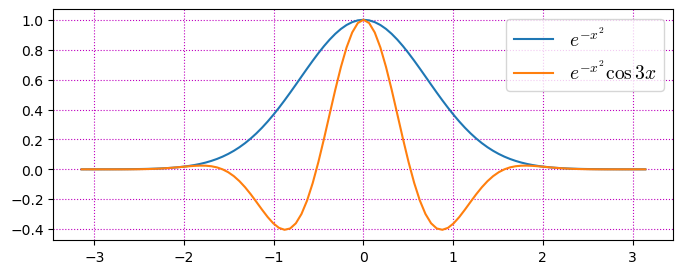

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 101)
y1 = np.exp(-x**2)
y2 = y1*np.cos(3*x)
plt.figure(figsize=(8, 3))
plt.plot(x, y1, x, y2)
prop = {'math_fontfamily':'cm', 'size':14} # 设定数学字体
plt.legend(['$e^{-x^2}$', '$e^{-x^2}\cos3x$'], prop=prop)
plt.grid('on',color='m', linestyle=':')
plt.show()

<font face='kaiti' size=4 style='line-height:1.5'>

2. 对星形线 $x^{\frac23}+y^{\frac23}=1$ 围成的区域，希望用蒙特卡罗方法求其面积。请你绘制一个示意图，以帮助大家理解。

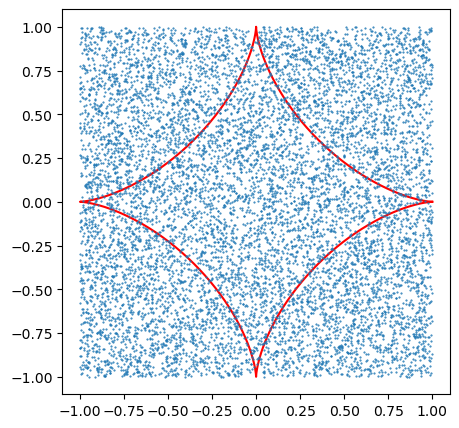

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 绘制曲线
t = np.linspace(0, 2*np.pi, 401)
x = np.cos(t)**3
y = np.sin(t)**3
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'r')
# 绘制随机点，注：不能用random.randn()，randn是正态分布
x = np.random.uniform(-1, 1, 10000) # x = np.random.rand(10000)*2-1
y = np.random.uniform(-1, 1, 10000) # y = np.random.rand(10000)*2-1
plt.plot(x, y, '.', markersize=1)
plt.show()

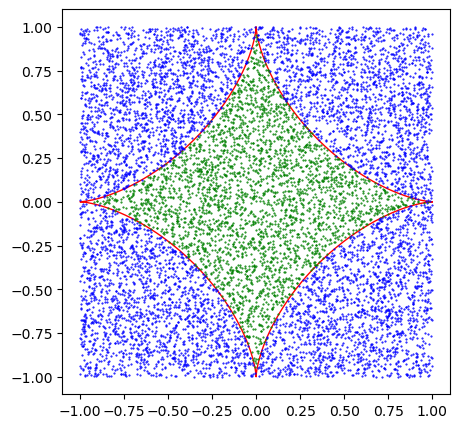

In [3]:
# 以下的图中，见区域内外的点用不同颜色表现
import numpy as np
import matplotlib.pyplot as plt

# 绘制曲线
t = np.linspace(0, 2*np.pi, 401)
x = np.cos(t)**3
y = np.sin(t)**3
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'r',linewidth=1)
# 绘制随机点，注：不能用random.randn()，randn是正态分布
x = np.random.uniform(-1, 1, 10000) # x = np.random.rand(10000)*2-1
y = np.random.uniform(-1, 1, 10000) # y = np.random.rand(10000)*2-1
flag = (x*x)**(1/3)+(y*y)**(1/3)<=1 # 区域内
plt.plot(x[flag], y[flag], 'g.', markersize=1)
plt.plot(x[~flag], y[~flag], 'b.', markersize=1)
plt.show()

<font face='kaiti' size=4 style='line-height:1.6'>  
    
3. 2022年全球主要经济体的工业增加值前10为 ['中国大陆', '美国', '欧盟', '日本', '俄罗斯', '印度',  '沙特', '韩国', '印尼', '英国'], 数额依次为 [59714.46, 37173.58, 30852.27, 9157.12, 6297.45, 6155.51, 5411.46, 4425.21,4169.40, 3798.07]；这些经济体也是2021年工业增加值的前10，但顺序有所差异，其数额依次为 [58055.60, 32091.75, 30694.91, 11651.53, 5010.89, 5747.71, 3430.38, 4940.82, 3488.52, 3760.97]。请按要求在同一图形窗口中绘制下列3个图形：(1) 在一组条形图中同时表现2022年和2021年工业增加值的前10；(2)以两个饼图分别表现2022年和2021年的工业增加值，要求按顺序排列。(3)条形图放在上方，占一半空间，两个饼图放在下方，各占剩余的一半空间，并添加适当的文字标注。

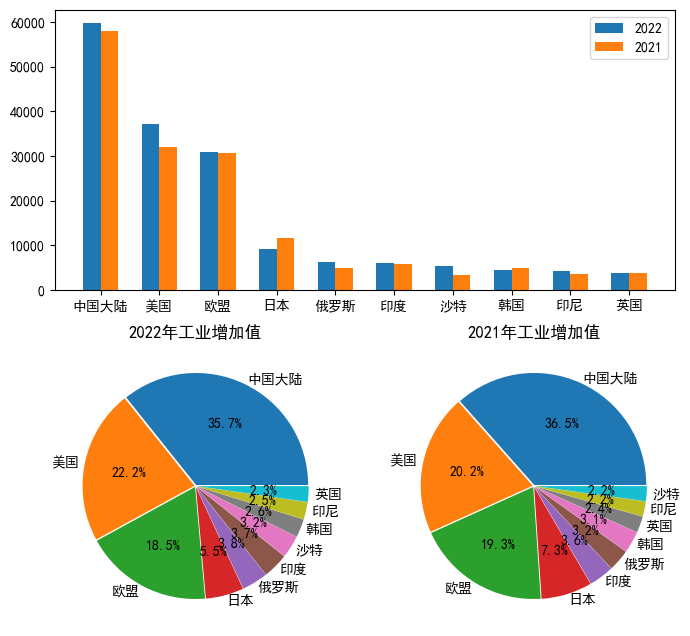

In [4]:
import numpy as np
import matplotlib.pyplot as plt

economy = np.array(['中国大陆', '美国', '欧盟', '日本', '俄罗斯',
                   '印度', '沙特', '韩国', '印尼', '英国'])
indust2022 = np.array([59714.46, 37173.58, 30852.27, 9157.12,
                       6297.45, 6155.51, 5411.46, 4425.21, 4169.40, 3798.07])
indust2021 = np.array([58055.60, 32091.75, 30694.91, 11651.53,
                       5010.89, 5747.71, 3430.38, 4940.82, 3488.52, 3760.97])
plt.figure(figsize=(8, 8))
# 条形图
plt.subplot(211)
plt.bar(np.arange(10)-0.15, indust2022, width=0.3, label='2022')
plt.bar(np.arange(10)+0.15, indust2021, width=0.3, label='2021')
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
plt.xticks(np.arange(10), economy)
plt.legend()
# 饼图
explode = 0.01 * np.ones(len(indust2022))
plt.subplot(223)
plt.pie(indust2022, explode=explode, labels=economy,
        autopct='%1.1f%%', labeldistance=1.05)
plt.title('2022年工业增加值')
plt.subplot(224)
ind = np.argsort(indust2021)[::-1] # 由大到小排序
plt.pie(indust2021[ind], explode=explode, labels=economy[ind],
        autopct='%1.1f%%', labeldistance=1.05)
plt.title('2021年工业增加值')
plt.show()

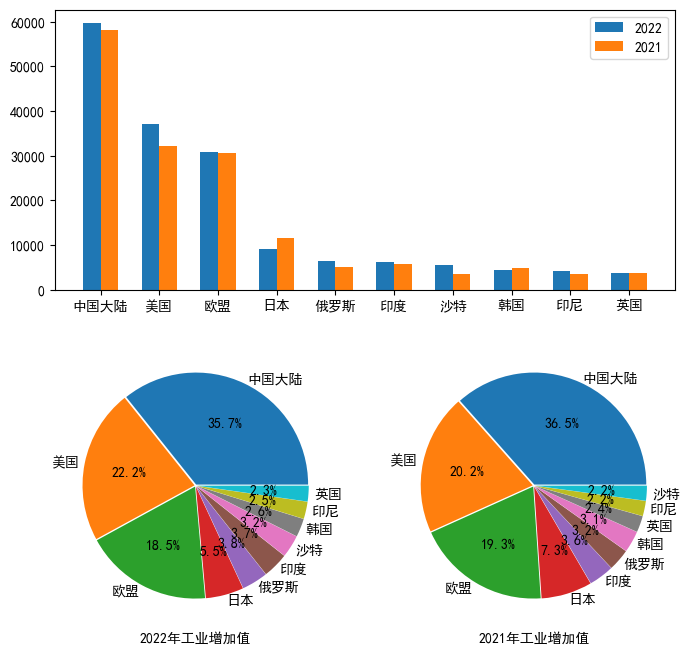

In [5]:
# 以下用subplot_mosaic()安装子图的布局
import numpy as np
import matplotlib.pyplot as plt

economy = np.array(['中国大陆', '美国', '欧盟', '日本', '俄罗斯',
                   '印度', '沙特', '韩国', '印尼', '英国'])
indust2022 = np.array([59714.46, 37173.58, 30852.27, 9157.12,
                       6297.45, 6155.51, 5411.46, 4425.21, 4169.40, 3798.07])
indust2021 = np.array([58055.60, 32091.75, 30694.91, 11651.53,
                       5010.89, 5747.71, 3430.38, 4940.82, 3488.52, 3760.97])
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
# 布局
layout = [['A','A'],
          ['B','C']]
fig, ax = plt.subplot_mosaic(layout, figsize=(8,8))
xa,xb,xc = ax.values()
# 条形图
xa.bar(np.arange(10)-0.15, indust2022, width=0.3, label='2022')
xa.bar(np.arange(10)+0.15, indust2021, width=0.3, label='2021')
xa.set_xticks(np.arange(10), economy)
xa.legend()
# 饼图
explode = 0.01 * np.ones(len(indust2022))
xb.pie(indust2022, explode=explode, labels=economy,
        autopct='%1.1f%%', labeldistance=1.05)
xb.set_xlabel('2022年工业增加值')
ind = np.argsort(indust2021)[::-1] # 由大到小排序
xc.pie(indust2021[ind], explode=explode, labels=economy[ind],
        autopct='%1.1f%%', labeldistance=1.05)
xc.set_xlabel('2021年工业增加值')
plt.show()

<font face='kaiti' size=4 style='line-height:1.5'>

4. 绘制三维曲线$\begin{cases} x = \dfrac t5,\\ y = \cos t,\\ z = \sin t.\end{cases} t\in[-4\pi, 4\pi]$，要求坐标轴单位长度相等，并添加适当的文字标注。

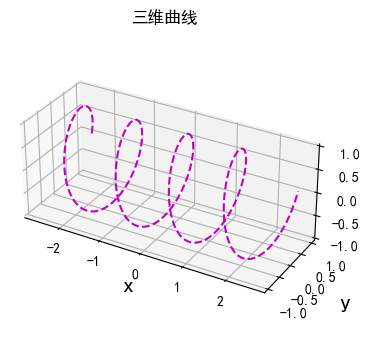

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(projection='3d')
t = np.linspace(-4*np.pi, 4*np.pi, 801)
x = t/5
y = np.cos(t)
z = np.sin(t)
ax.plot(x, y, z, 'm--')
ax.set_box_aspect((np.ptp(x), np.ptp(y), np.ptp(z)))
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示负号
ax.set_title('三维曲线')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
plt.show()

<font face='kaiti' size=4 style='line-height:1.5'> 
    
5. 分左右子图，绘制曲面$z = xe^{-x^2-y^2}$在区域 $x,y\in[-2,2]$上的图形，以及在区域 $x^2+y^2\leq4$ 上的图形.

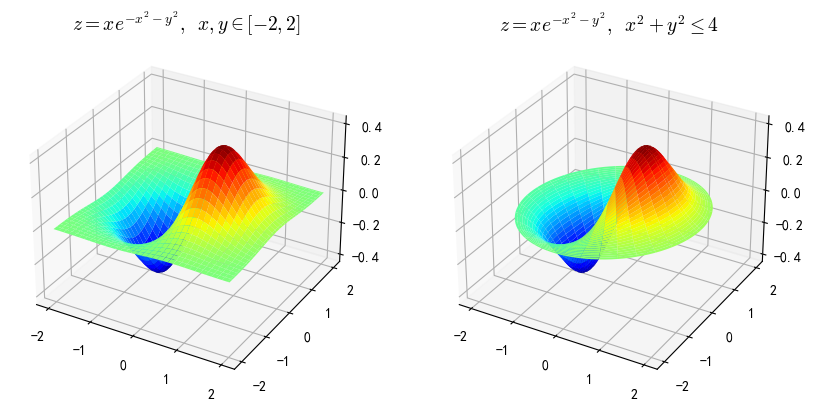

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 左子图绘制方域上的图形
x = np.linspace(-2, 2, 101)
X, Y = np.meshgrid(x, x)
Z = X*np.exp(-X*X-Y*Y)
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='jet')
prop = {'math_fontfamily':'cm', 'size':14} # 设定数学字体
ax1.set_title('$z=xe^{-x^2-y^2},\;\; x,y\in[-2,2]$', fontdict=prop)
# 右子图绘制圆域上的图形
t = np.linspace(0, 2*np.pi, 101)
r = np.linspace(0, 2, 41)
r, t = np.meshgrid(r, t)
x = r*np.cos(t)
y = r*np.sin(t)
z = x*np.exp(-r*r)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, cmap='jet')
ax2.set_title('$z=xe^{-x^2-y^2},\;\; x^2+y^2\leq 4$', fontdict=prop)
plt.show()

<font face='kaiti' size=4 style='line-height:1.5'>    
    
6. 在同一个坐标系中，绘制标准正态分布的概率密度函数 $\displaystyle\rho(x) = \frac1{\sqrt{2\pi}}e^{-\frac{x^2}{2}}, x\in(-\infty, +\infty)$的曲线，以及其分布函数 $\displaystyle f(x)=\int_{-\infty}^x \rho(t) dt$ 的曲线，$x$的范围可取 $x\in[-5,5]$。分布函数可以用数值积分计算。添加适当文字标注。

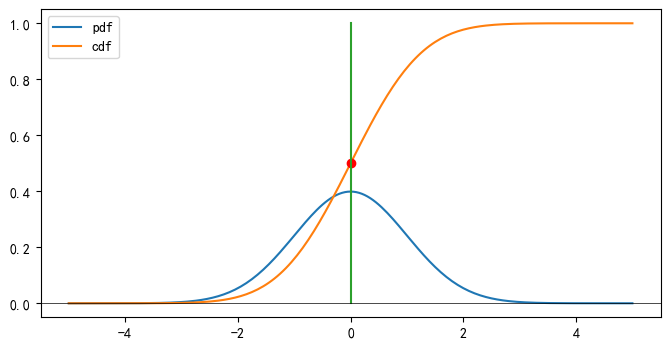

In [8]:
a, b, n = -5, 5, 201
x = np.linspace(a, b, n)
p = np.exp(-x*x/2)/np.sqrt(2*np.pi)  # 标准正态分布的概率密度函数
# 以下用梯形积分求分布函数
dx = (b-a)/(n-1)  # 步长
F = np.cumsum(p[0:-1] + p[1:])/2*dx
F = np.insert(F, 0, 0)  # 在头部插入0
# 方法2：分布函数也可以用scipy中的integrate模块的cumtrapz函数如下求解：
# from scipy.integrate import cumtrapz
# F = cumtrapz(p, x, initial=0)
# 方法3：分布函数也可以用scipy中的integrate模块的quad函数如下求解：
# from scipy.integrate import quad
# def pdf(x):
#     return np.exp(-x*x/2)/np.sqrt(2*np.pi)
# def cdf(x):
#     return quad(pdf, -np.inf, x)[0]
# F = np.array([cdf(i) for i in x])
# 方法4：正态分布函数也可以使用Scipy的特殊函数 ndtr
# from scipy.special import ndtr
# F = ndtr(x)
# 绘制图形，添加标注
fig = plt.figure(figsize=(8, 4))
plt.plot(x, p, x, F)
plt.legend(('pdf', 'cdf'))
plt.plot(0, 0.5, 'ro', [0, 0], [0, 1])  # 绘制对称轴
plt.axhline(y=0, color='k', linewidth=0.5)  # x轴
plt.show()

<font face='kaiti' size=4 style='line-height:1.8'>

7. 一组样本的多个特征之间可能存在不同程度的相关性，其大小可以用热力图做可视化的呈现。现有来自志愿者的一组健康数据'health.csv'，各列分别为年龄、胆固醇、收缩压、舒张压、体重指数、心率、血糖水平等特征。试用直方图表现各特征的分布情况，然后求各特征间的相关系数，并将相关系数矩阵用热力图表现。<br>
&emsp; 数据集已在下方导入。

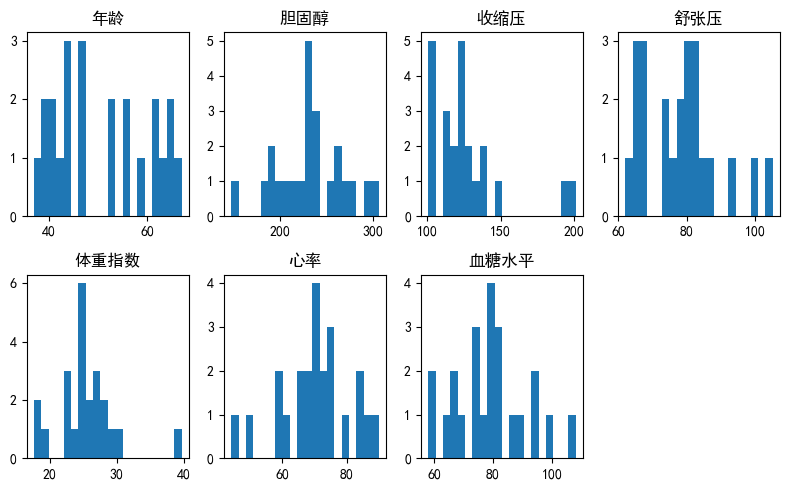

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

label = ['年龄','胆固醇','收缩压','舒张压','体重指数','心率','血糖水平']
with open('health.csv', 'r') as file:    
    health = pd.read_csv(file, skiprows=1, names=label)
# 绘制直方图
fig = plt.figure(figsize=(8,5))
for k, feature in enumerate(label,1):
    plt.subplot(2, 4, k)
    plt.hist(health[feature], bins=20)
    plt.title(feature)
plt.tight_layout()
plt.show()

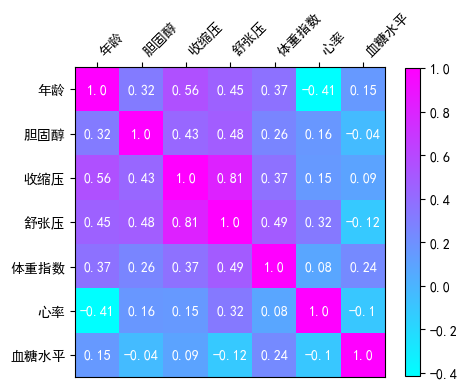

In [10]:
# 求相关系数矩阵，并绘制热力图
corr = np.corrcoef(health, rowvar=False)
fig = plt.figure(figsize=(5, 5))
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示负号
im = plt.imshow(corr, cmap='cool')
plt.colorbar(im, shrink=0.8)
r, c = corr.shape
for i in range(r):
    for j in range(c):
        plt.text(j, i, np.round(corr[i, j], 2),
                 ha="center", va="center", color="w")
ax = plt.gca()
ax.xaxis.set_label_position('top')  # 坐标轴上置
ax.xaxis.tick_top()  # 刻度朝上
plt.xticks(range(len(label)), label, rotation=45, ha='left')  # 刻度标签旋转并左对齐
plt.yticks(range(len(label)), label)
plt.show()

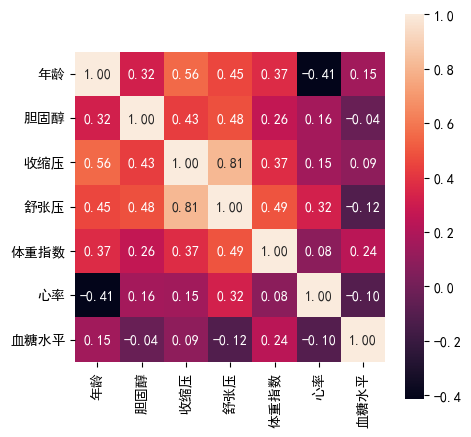

In [11]:
# 承上，使用seaborn中的heatmap()绘制热力图
import seaborn as sns
fig = plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, square=True, fmt='.2f',
            xticklabels=label, yticklabels=label)
plt.show()

<font face='kaiti' size=4 style='line-height:1.8'>

8.  鸢尾花数据集'iris.csv'常用于演示分类问题。其中共有3个品种：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），Iris Virginica（维吉尼亚鸢尾），各品种均有50个样本，4个特征：Sepal.Length（花萼长度）、Sepal.Width（花萼宽度）、Petal.Length（花瓣长度）、Petal.Width（花瓣宽度）。数据集的前4列为特征数据，最后一列为品种代号。请对这些特征两两组合（如花萼长度做x轴，花萼宽度做y轴）绘制散点图，对不同品种用不同颜色的点表示。<br>
&emsp; 数据集已在下方导入。

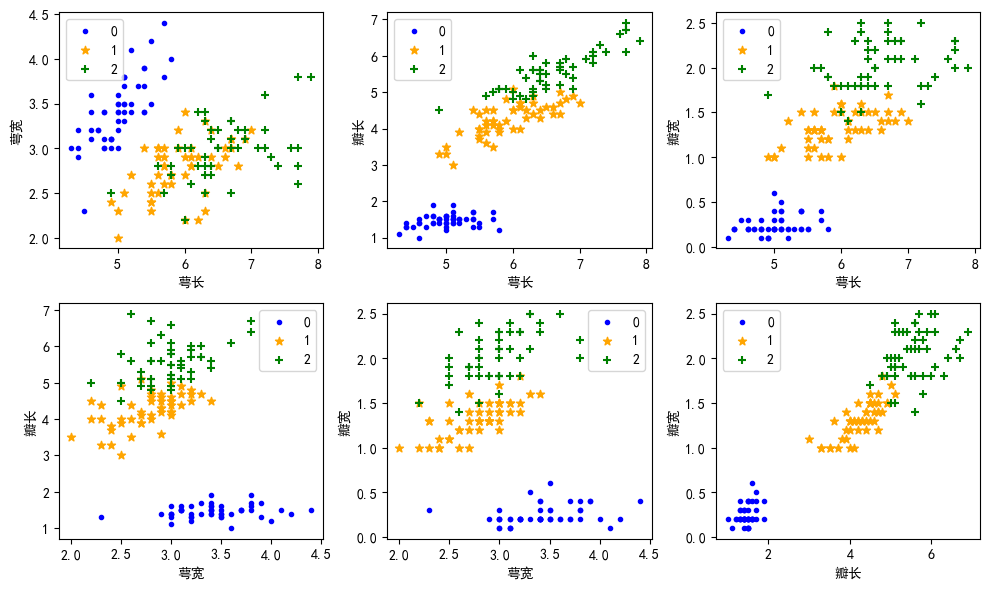

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

label = ['萼长', '萼宽', '瓣长', '瓣宽', '品种']
# 导入数据集
iris = pd.read_csv('iris.csv', skiprows=1, names=label)
iris.head()
# 绘制多个散点图
target = iris['品种'].values
num = np.unique(target)  # 不重复的品种代号
fig = plt.figure(figsize=(10,6))  # 创建图形窗口
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示负号
color = ['blue', 'orange', 'green']
marker = ['.', '*', '+']
i = 0    # 子图序号
for k in range(len(num)):
    var1 = iris.iloc[:,k]  # 取第 1 个特征
    for n in range(k + 1, 4):
        var2 = iris.iloc[:,n]  # 取第2个特征
        # 以下画第 i 个子图
        i = i + 1
        plt.subplot(2, 3, i)
        plt.xlabel(label[k])    # 设置x轴标注
        plt.ylabel(label[n])    # 设置y轴标注
        for m in range(len(num)):
            ft1 = var1[target == num[m]]
            ft2 = var2[target == num[m]]
            plt.scatter(ft1, ft2, color=color[m], marker=marker[m])
        plt.legend(num)    # 设置图例
plt.tight_layout()
plt.show()